In [23]:
import numpy as np

In [24]:
import math

In [25]:
import matplotlib.pyplot as plt

In [26]:
import sympy

In [27]:
from sympy import *

In [28]:
import matplotlib.animation as animation

In [29]:
import random

In [30]:
# 単位ベクトルの生成
k = np.array(random.sample(range(1,100), 3))  # 例としてランダムな単位ベクトルを使用
kn = np.linalg.norm(k) #生成したベクトルの大きさ
n = k / kn

# 単位ベクトルに垂直な単位ベクトルの生成
def generate_perpendicular_unit_vector(n):
    """
    入力された単位ベクトル v に垂直な単位ベクトルを生成する
    """
    if np.all(n == 0):
        raise ValueError("The input vector v should not be the zero vector.")
    
    # 任意のベクトル w を選択
    if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
        w = np.array([1, 0, 0])
    elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
        w = np.array([0, 1, 0])
    else:
        w = np.array([0, 0, 1])
    
    # n と w の外積を計算して、n に垂直なベクトルを求める
    perp_vec = np.cross(n, w)
    
    # 垂直なベクトルを正規化して単位ベクトルにする
    perp_unit_vec = perp_vec / np.linalg.norm(perp_vec)
    
    return perp_unit_vec

# sに書き換えてる
s = generate_perpendicular_unit_vector(n)

# thetaの書き換え
theta = np.radians(90)

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    h = (s * np.cos(theta) +
             np.cross(n, s) * np.sin(theta) +
             n * np.dot(n, s) * (1 - np.cos(theta)))
    return h

# hに書き換えてる
h = rodrigues_rotation(n, s, theta)

# 原子を回転させるための行列
def rotation_matrix():
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(3):
        kx = 0
        ky = 0
        kz = 1
        R = Matrix([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        t = 120
        theta = np.radians(t*i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * (R @ R)
        matrices.append(rot_mat)
    return matrices

# Rに書き換えてる
R = rotation_matrix()

# i = 0, 1, 2 の場合の rot_mat を表示
for i in range(3):
    XX, XY, YY, YZ, ZZ, XZ = [random.uniform(1e-4, 1e-2) for _ in range(6)]
    K = Matrix([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    K[i] = Matrix([[h[0], h[1], h[2]]])*R[i]*K*R[i].inv()*Matrix([[h[0]], [h[1]], [h[2]]])

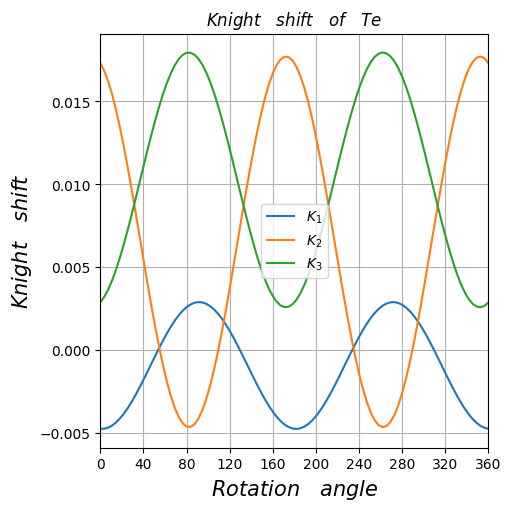

In [31]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_xticks(np.linspace(0, 360, 10))
axes.grid()

x = np.linspace(0, 360, 100)

# 単位ベクトルの生成
k = np.array(random.sample(range(1, 100), 3))  # 例としてランダムな単位ベクトルを使用
kn = np.linalg.norm(k)  # 生成したベクトルの大きさ
n = k / kn

# 単位ベクトルに垂直な単位ベクトルの生成
def generate_perpendicular_unit_vector(n):
    """
    入力された単位ベクトル n に垂直な単位ベクトルを生成する
    """
    if np.all(n == 0):
        raise ValueError("The input vector n should not be the zero vector.")
    
    # 任意のベクトル w を選択
    if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
        w = np.array([1, 0, 0])
    elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
        w = np.array([0, 1, 0])
    else:
        w = np.array([0, 0, 1])
    
    # n と w の外積を計算して、n に垂直なベクトルを求める
    perp_vec = np.cross(n, w)
    
    # 垂直なベクトルを正規化して単位ベクトルにする
    perp_unit_vec = perp_vec / np.linalg.norm(perp_vec)
    
    return perp_unit_vec

# sに書き換えてる
s = generate_perpendicular_unit_vector(n)

# thetaの書き換え
theta = np.radians(x)

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    h = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(n, s)[:, np.newaxis] * np.sin(theta) +
         n[:, np.newaxis] * np.dot(n, s) * (1 - np.cos(theta)))
    return h

# hに書き換えてる
h = rodrigues_rotation(n, s, theta)

# 原子を回転させるための行列
def rotation_matrix():
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(3):
        kx = 0
        ky = 0
        kz = 1
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        t = 120
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

# Rに書き換えてる
R = rotation_matrix()

# i = 0, 1, 2 の場合の rot_mat を計算して表示
for i in range(3):
    XX, XY, YY, YZ, ZZ, XZ = [random.uniform(1e-4, 1e-2) for _ in range(6)]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    # hの各ベクトルを使ってKを計算
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), h_vec))))
        K_rot_values.append(K_rot)
    
    # 各角度に対するK_rotの値を取得し、プロット
    axes.plot(x, K_rot_values, label=f'$K_{i+1}$')

axes.legend()

# 自動スケール調整
plt.autoscale(enable=True, axis='y')

plt.show()

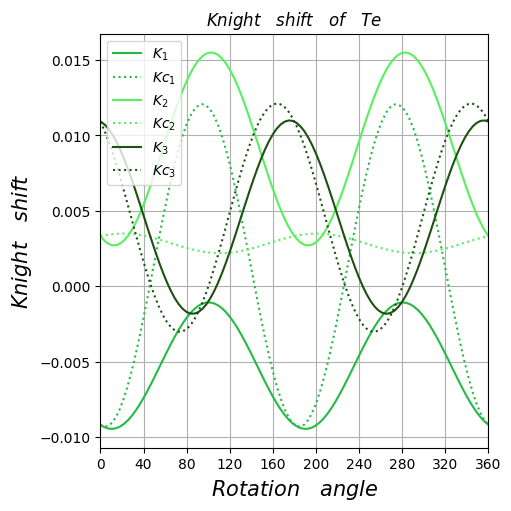

In [32]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_xticks(np.linspace(0, 360, 10))
axes.grid()

x = np.linspace(0, 360, 100)

# 単位ベクトルの生成
k = np.array(random.sample(range(1, 100), 3))  # 例としてランダムな単位ベクトルを使用
kn = np.linalg.norm(k)  # 生成したベクトルの大きさ
n = k / kn

# 単位ベクトルに垂直な単位ベクトルの生成
def generate_perpendicular_unit_vector(n):
    """
    入力された単位ベクトル n に垂直な単位ベクトルを生成する
    """
    if np.all(n == 0):
        raise ValueError("The input vector n should not be the zero vector.")
    
    # 任意のベクトル w を選択
    if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
        w = np.array([1, 0, 0])
    elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
        w = np.array([0, 1, 0])
    else:
        w = np.array([0, 0, 1])
    
    # n と w の外積を計算して、n に垂直なベクトルを求める
    perp_vec = np.cross(n, w)
    
    # 垂直なベクトルを正規化して単位ベクトルにする
    perp_unit_vec = perp_vec / np.linalg.norm(perp_vec)
    
    return perp_unit_vec

# sに書き換えてる
s = generate_perpendicular_unit_vector(n)

# n×sの計算
c = np.cross(n, s)

# thetaの書き換え
theta = np.radians(x)

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    h = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(n, s)[:, np.newaxis] * np.sin(theta) +
         n[:, np.newaxis] * np.dot(n, s) * (1 - np.cos(theta)))
    return h

# hに書き換えてる
h = rodrigues_rotation(n, s, theta)

# ロドリゲスの回転公式×磁場ベクトル（垂直版）
def rodrigues_rotation2(c, s, theta):
    hc = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(c, s)[:, np.newaxis] * np.sin(theta) +
         c[:, np.newaxis] * np.dot(c, s) * (1 - np.cos(theta)))
    return hc

# hcに書き換えてる
hc = rodrigues_rotation2(c, s, theta)

# 結晶中に同じ原子が何個あるか（入力）
l = 3

# 原子を回転させるための行列
def rotation_matrix():
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        kx = 0 #原子の回転軸ベクトルのx座標（入力）
        ky = 0 #原子の回転軸ベクトルのy座標（入力）
        kz = 1 #原子の回転軸ベクトルのz座標（入力）
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        t = 120 #回転角度（入力）
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

# Rに書き換えてる
R = rotation_matrix()

# 各iに対応する色を設定
colors = np.random.rand(l, l)

# それぞれのiでのナイトシフトの磁場角度依存性を計算して表示
for i in range(l):
    XX, XY, YY, YZ, ZZ, XZ = [random.uniform(1e-4, 1e-2) for _ in range(6)]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    # hの各ベクトルを使ってKを計算
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), h_vec))))
        K_rot_values.append(K_rot)
    
    # hcの各ベクトルを使ってKを計算
    Kc_rot_values = []
    for j in range(len(hc[0])):
        hc_vec = np.array([hc[0][j], hc[1][j], hc[2][j]])
        Kc_rot = np.dot(hc_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), hc_vec))))
        Kc_rot_values.append(Kc_rot)

    # 各角度に対するK_rotの値を取得し、プロット
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')
    axes.plot(x, Kc_rot_values, ":", color=colors[i], label=f'$Kc_{i+1}$')

axes.legend()

# 自動スケール調整
plt.autoscale(enable=True, axis='y')

plt.show()

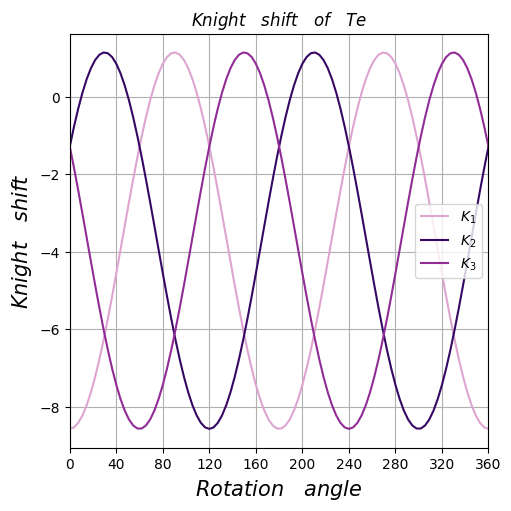

In [33]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_xticks(np.linspace(0, 360, 10))
axes.grid()

x = np.linspace(0, 360, 100)

# 単位ベクトルの生成
# k = np.array(random.sample(range(1, 100), 3))  # 例としてランダムな単位ベクトルを使用
# kn = np.linalg.norm(k)  # 生成したベクトルの大きさ
# n = k / kn

# # 単位ベクトルに垂直な単位ベクトルの生成
# def generate_perpendicular_unit_vector(n):
#     """
#     入力された単位ベクトル n に垂直な単位ベクトルを生成する
#     """
#     if np.all(n == 0):
#         raise ValueError("The input vector n should not be the zero vector.")
    
#     # 任意のベクトル w を選択
#     if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
#         w = np.array([1, 0, 0])
#     elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
#         w = np.array([0, 1, 0])
#     else:
#         w = np.array([0, 0, 1])
    
#     # n と w の外積を計算して、n に垂直なベクトルを求める
#     perp_vec = np.cross(n, w)
    
#     # 垂直なベクトルを正規化して単位ベクトルにする
#     perp_unit_vec = perp_vec / np.linalg.norm(perp_vec)
    
#     return perp_unit_vec

# # sに書き換えてる
# s = generate_perpendicular_unit_vector(n)

n = np.array([0, 0, 1])
s = np.array([1, 0, 0])

# n×sの計算
c = np.cross(n, s)

# thetaの書き換え
theta = np.radians(x)

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    h = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(n, s)[:, np.newaxis] * np.sin(theta) +
         n[:, np.newaxis] * np.dot(n, s) * (1 - np.cos(theta)))
    return h

# hに書き換えてる
h = rodrigues_rotation(n, s, theta)

# ロドリゲスの回転公式×磁場ベクトル（垂直版）
def rodrigues_rotation2(c, s, theta):
    hc = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(c, s)[:, np.newaxis] * np.sin(theta) +
         c[:, np.newaxis] * np.dot(c, s) * (1 - np.cos(theta)))
    return hc

# hcに書き換えてる
hc = rodrigues_rotation2(c, s, theta)

# 結晶中に同じ原子が何個あるか（入力）
l = 3

# 原子を回転させるための行列
def rotation_matrix():
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        kx = 0 #原子の回転軸ベクトルのx座標（入力）
        ky = 0 #原子の回転軸ベクトルのy座標（入力）
        kz = 1 #原子の回転軸ベクトルのz座標（入力）
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        t = 120 #回転角度（入力）
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

# Rに書き換えてる
R = rotation_matrix()

# 各iに対応する色を設定
colors = np.random.rand(l, l)

# それぞれのiでのナイトシフトの磁場角度依存性を計算して表示
for i in range(l):
    XX, XY, YY, YZ, ZZ, XZ = [-8.572*10**(-4), 0, 1.146*10**(-4), 8.830*10**(-4), 0, 0]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    # hの各ベクトルを使ってKを計算
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), h_vec))))*10**(4)
        K_rot_values.append(K_rot)
    
    # hcの各ベクトルを使ってKを計算
    Kc_rot_values = []
    for j in range(len(hc[0])):
        hc_vec = np.array([hc[0][j], hc[1][j], hc[2][j]])
        Kc_rot = np.dot(hc_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), hc_vec))))
        Kc_rot_values.append(Kc_rot)

    # 各角度に対するK_rotの値を取得し、プロット
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')
    # axes.plot(x, Kc_rot_values, ":", color=colors[i], label=f'$Kc_{i+1}$')

axes.legend()

# 自動スケール調整
plt.autoscale(enable=True, axis='y')

plt.show()